In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, Flatten, Reshape
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import backend as K

TensorFlow 2.x selected.


In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [3]:
(x_train, _), (x_test, _) = cifar100.load_data()

img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
channels = x_train.shape[3]

x_train_gray = rgb2gray(x_train)
x_test_gray = rgb2gray(x_test)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_gray = x_train_gray.astype('float32') / 255
x_test_gray = x_test_gray.astype('float32') / 255

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], img_rows, img_cols, 1)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], img_rows, img_cols, 1)

169009152/169001437 [==============================] - 2s 0us/step


In [4]:
class Encoder(Model):

  def __init__(self):
    super(Encoder, self).__init__(name='encoder')

    self.conv_1 = Conv2D(64, 3, 2, activation='relu', padding='same')
    self.conv_2 = Conv2D(128, 3, 2, activation='relu', padding='same')
    self.conv_3 = Conv2D(256, 3, 2, activation='relu', padding='same')

  def call(self, inputs):
    x = self.conv_1(inputs)
    x = self.conv_2(x)
    x = self.conv_3(x)
    return x

class Decoder(Model):

  def __init__(self):
    super(Decoder, self).__init__(name='decoder')

    self.conv_1 = Conv2DTranspose(256, 3, 2, activation='relu', padding='same')
    self.conv_2 = Conv2DTranspose(128, 3, 2, activation='relu', padding='same')
    self.conv_3 = Conv2DTranspose(64, 3, 2, activation='relu', padding='same')
    self.conv_4 = Conv2DTranspose(channels, 3, activation='sigmoid', padding='same')

  def call(self, inputs):
    x = self.conv_1(inputs)
    x = self.conv_2(x)
    x = self.conv_3(x)
    return self.conv_4(x)

class AutoEncoder(Model):

  def __init__(self):
    super(AutoEncoder, self).__init__(name='autoencoder')

    self.encoder = Encoder()
    self.decoder = Decoder()

  def call(self, inputs):
    x = self.encoder.call(inputs)
    return self.decoder.call(x)

model = AutoEncoder()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train_gray, x_train, validation_data=(x_test_gray, x_test), batch_size=32, epochs=3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 586s 12ms/sample - loss: 0.0135 - accuracy: 0.4992 - val_loss: 0.0109 - val_accuracy: 0.5297
Epoch 2/3
50000/50000 [==============================] - 583s 12ms/sample - loss: 0.0099 - accuracy: 0.5030 - val_loss: 0.0096 - val_accuracy: 0.5136
Epoch 3/3
50000/50000 [==============================] - 585s 12ms/sample - loss: 0.0094 - accuracy: 0.5081 - val_loss: 0.0095 - val_accuracy: 0.5345


In [0]:
x_decoded = model.predict(x_test_gray)

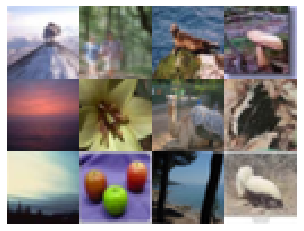

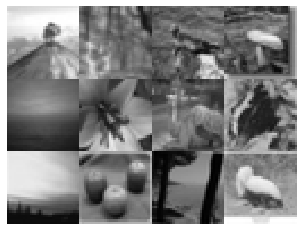

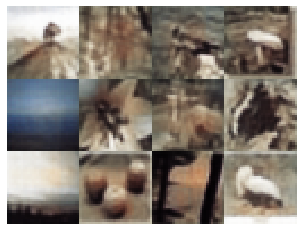

In [9]:
# kolorowe
imgs = x_test[:12]
imgs = imgs.reshape((3, 4, img_rows, img_cols, channels))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.imshow(imgs, interpolation='none')
plt.show()

# w skali szarości
imgs = x_test_gray[:12]
imgs = imgs.reshape((3, 4, img_rows, img_cols))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

# po uczeniu
imgs = x_decoded[:12]
imgs = imgs.reshape((3, 4, img_rows, img_cols, channels))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.imshow(imgs, interpolation='none')
plt.show()